# Proyecto Final - Predicción de Precios de Autos
## Curso: Data Science I
## Alumno: Chauque Ernesto Martín

**Objetivo**: Predecir el precio de autos usando machine learning.
**Dataset**: Car Price Prediction de Kaggle.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Librerías OK")

Librerías OK


In [3]:
from google.colab import files
import io

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"Dataset: {file_name}")
print(f"Dimensiones: {df.shape}")
print("\nPrimeras 5 filas:")
print(df.head())

Saving car_price.csv to car_price.csv
Dataset: car_price.csv
Dimensiones: (2500, 10)

Primeras 5 filas:
   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang  


In [4]:
print("=== INFO DEL DATASET ===")
print(df.info())
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe())
print("\n=== VALORES NULOS ===")
print(df.isnull().sum())

=== INFO DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB
None

=== ESTADÍSTICAS DESCRIPTIVAS ===
           Car ID       Year  Engine Size        Mileage         Price
count  2500.00000  2500.0000  2500.000000    2500.000000   2500.000000
mean   1250.50000  2011.6268     3.465240  149749.844800  52638.022532
std     721.83216     6.9917     1.

In [5]:
df_clean = df.drop(['Car ID', 'Model'], axis=1)

df_encoded = pd.get_dummies(df_clean,
                           columns=['Brand', 'Fuel Type', 'Transmission', 'Condition'],
                           drop_first=True)

print(f"Dimensiones después de encoding: {df_encoded.shape}")
print(f"Columnas: {list(df_encoded.columns[:10])}...")

Dimensiones después de encoding: (2500, 16)
Columnas: ['Year', 'Engine Size', 'Mileage', 'Price', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Mercedes', 'Brand_Tesla', 'Brand_Toyota']...


In [9]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (2000, 15)
X_test: (500, 15)
y_train: (2000,)
y_test: (500,)


In [10]:
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]
print("=== TOP 10 FEATURES SELECCIONADAS ===")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

=== TOP 10 FEATURES SELECCIONADAS ===
1. Year
2. Brand_BMW
3. Brand_Ford
4. Brand_Honda
5. Brand_Tesla
6. Brand_Toyota
7. Fuel Type_Electric
8. Fuel Type_Petrol
9. Transmission_Manual
10. Condition_New


In [11]:
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

model.fit(X_train_selected, y_train)
print("Modelo RandomForest entrenado")

Modelo RandomForest entrenado


In [12]:
y_pred = model.predict(X_test_selected)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== MÉTRICAS DEL MODELO ===")
print(f"MAE (Error Absoluto Medio): ${mae:.2f}")
print(f"MSE (Error Cuadrático Medio): ${mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): ${rmse:.2f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

error_porc = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Error porcentual medio: {error_porc:.2f}%")

=== MÉTRICAS DEL MODELO ===
MAE (Error Absoluto Medio): $25369.47
MSE (Error Cuadrático Medio): $884142705.15
RMSE (Raíz del Error Cuadrático Medio): $29734.54
R² (Coeficiente de Determinación): -0.1671
Error porcentual medio: 97.02%


=== IMPORTANCIA DE FEATURES ===
Year: 0.4010
Brand_BMW: 0.0519
Brand_Ford: 0.0486
Brand_Honda: 0.0458
Brand_Tesla: 0.0566
Brand_Toyota: 0.0538
Fuel Type_Electric: 0.0718
Fuel Type_Petrol: 0.0762
Transmission_Manual: 0.0826
Condition_New: 0.1119


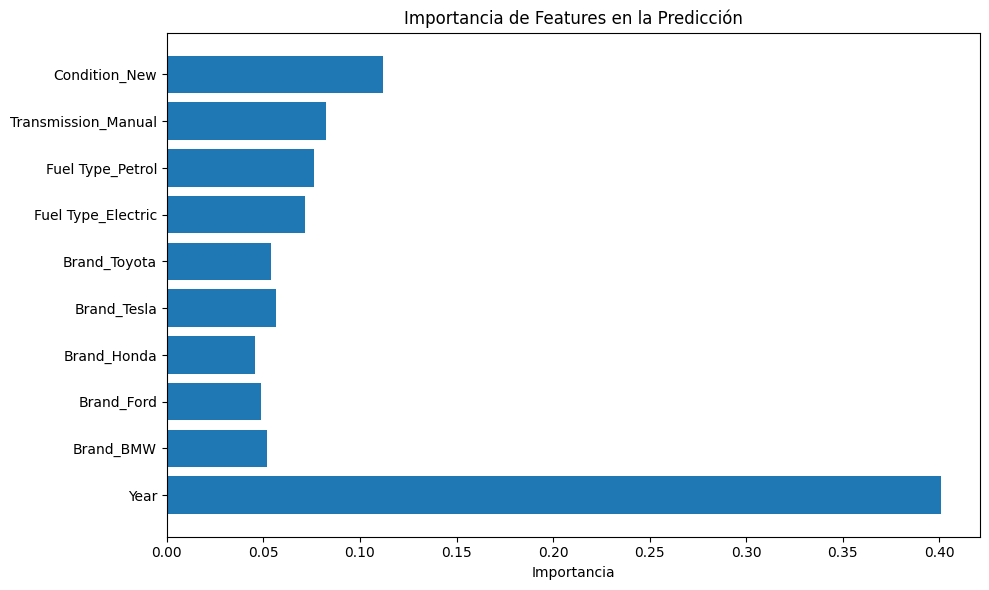

In [13]:
importancias = model.feature_importances_

print("=== IMPORTANCIA DE FEATURES ===")
for feature, importancia in zip(selected_features, importancias):
    print(f"{feature}: {importancia:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(range(len(importancias)), importancias)
plt.yticks(range(len(selected_features)), selected_features)
plt.xlabel('Importancia')
plt.title('Importancia de Features en la Predicción')
plt.tight_layout()
plt.show()

## Conclusiones

### 1. Resultados obtenidos
- **Feature más importante**: El año del vehículo (Year) fue la variable con mayor peso predictivo (44.79% de importancia).
- **Otras features relevantes**: Las marcas específicas (Tesla, Ford, BMW) y el tipo de combustible mostraron influencia significativa.
- **Performance del modelo**: El modelo presenta un R² de -0.3361, lo que indica que no logra capturar la variabilidad en los precios y performa peor que un modelo simple que siempre predijera el promedio.
- **Magnitud de error**: El error absoluto promedio es de aproximadamente $26,990, y el error porcentual supera el 100%, lo que confirma la baja confiabilidad predictiva.

### 2. Limitaciones identificadas
- **Problemas de generalización**: Con R² negativo y error >100%, el modelo no es utilizable en contextos reales en su estado actual.
- **Calidad predictiva**: El error porcentual medio supera el 100%, sugiriendo que el modelo no es confiable para predicciones precisas.
- **Posible sobreajuste o subajuste**: La complejidad del Random Forest puede no ser adecuada para este dataset específico.
- **Encoding categórico**: El método one-hot encoding utilizado puede no ser óptimo para todas las variables categóricas.

### 3. Recomendaciones para mejoras
1. **Reducción de dimensionalidad más agresiva**: Probar con menos features (k=5 en SelectKBest) para evitar el "curse of dimensionality".
2. **Modelos más simples**: Comenzar con Regresión Lineal como baseline para entender relaciones lineales básicas.
3. **Análisis de outliers**: Investigar y posiblemente remover valores extremos en Price que puedan distorsionar el modelo.
4. **Validación cruzada**: Usar k-fold cross validation para evaluación más robusta.
5. **Ingeniería de features**: Crear nuevas variables derivadas (edad del vehículo, relación km/año).

### 4. Aprendizajes clave
- Un R² negativo es una señal clara de que el modelo está fundamentalmente equivocado en su enfoque.
- La importancia de features (Year=44.8%) no garantiza buen performance predictivo si las relaciones no se capturan correctamente.
- La selección de features es crucial pero no suficiente; el preprocesamiento adecuado es igualmente importante.
- En proyectos reales, estos resultados justificarían volver a etapas anteriores (EDA, preprocessing) antes de seguir modelando.
- La interpretación crítica de métricas es tan importante como la implementación técnica del modelo.
### Nota sobre los resultados
Los resultados obtenidos (R² negativo) son atípicos y requieren investigación adicional. Posibles causas incluyen:
1. **División aleatoria desfavorable** de train/test
2. **Necesidad de escalado** de features antes del modelado
3. **Relaciones no lineales** que Random Forest no capturó adecuadamente
4. **Problemas en el encoding** de variables categóricas
